# PCA Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from PED and Load Data

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    'PED00423e001',
    'PED00424e001',
    'PED00160e001'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')
analysis.generate_trajectories()

Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00423e001.tar.gz
Downloaded file PED00423e001.tar.gz from PED.
Extracted file PED00423e001.pdb.
Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00424e001.tar.gz
Downloaded file PED00424e001.tar.gz from PED.
Extracted file PED00424e001.pdb.
Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00160e001.tar.gz
Downloaded file PED00160e001.tar.gz from PED.
Extracted file PED00160e001.pdb.
Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00423e001.pdb.
Saving trajectory.
Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00424e001.pdb.
Saving trajectory.
Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00160e001.pdb.
Saving trajectory.


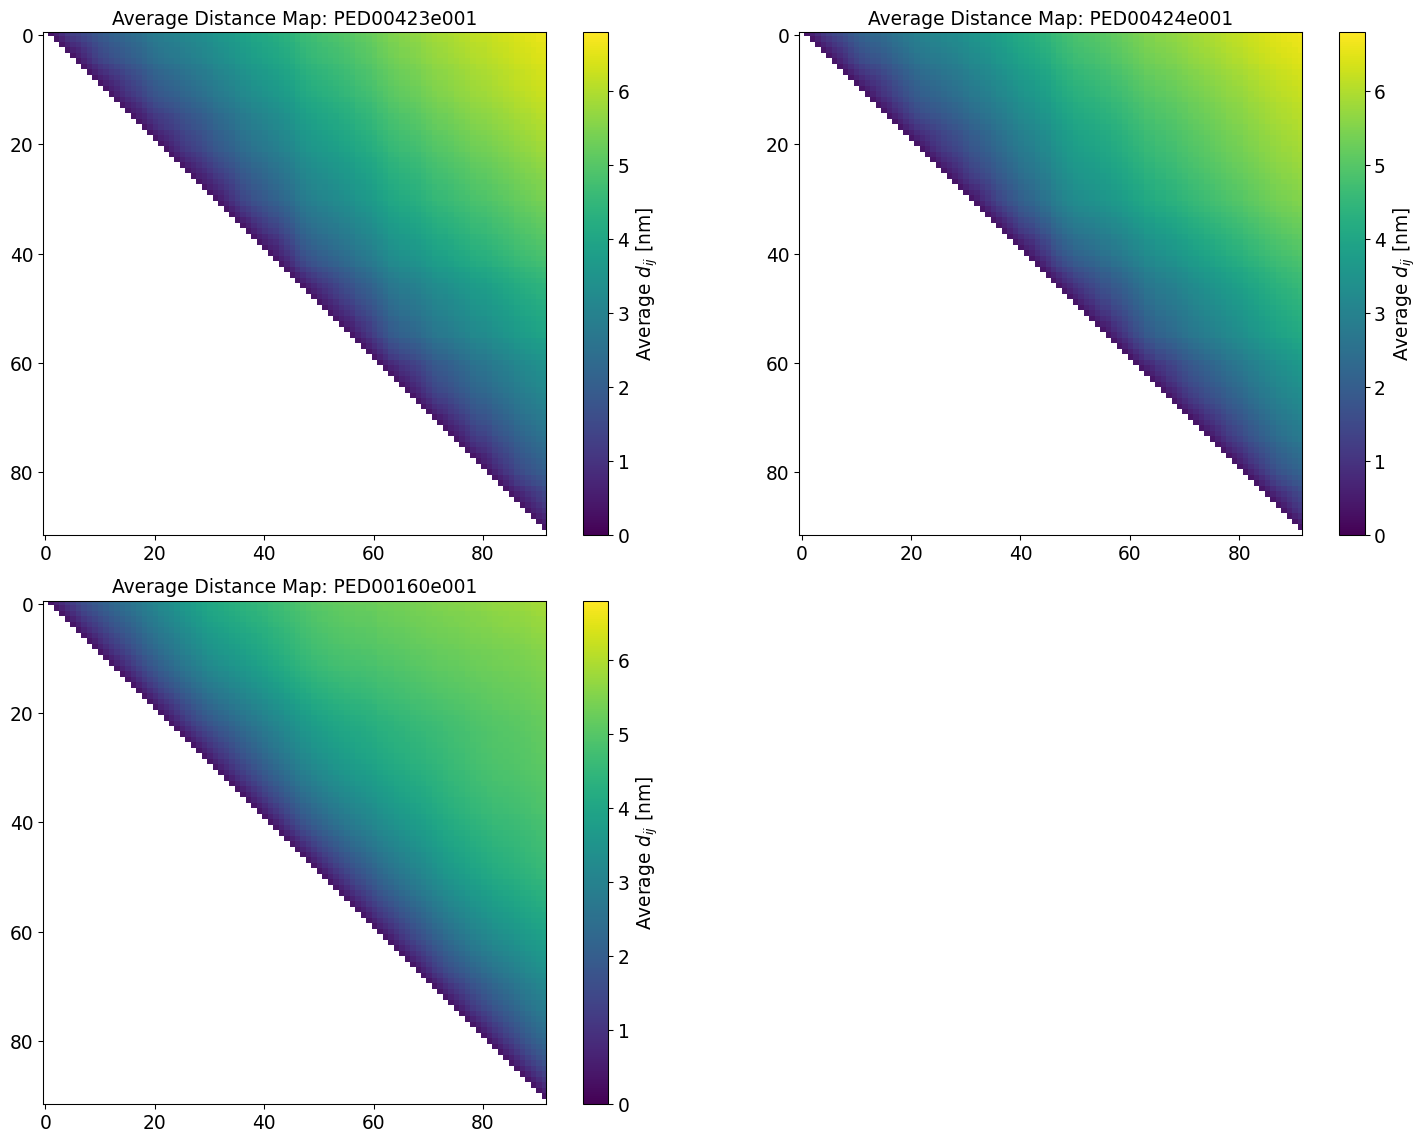

In [3]:
analysis.plot_average_dmap_comparison()

## Featurization

In [4]:
analysis.perform_feature_extraction(featurization='ca_dist', normalize=False)

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 4095)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 4095)
Performing feature extraction for Ensemble: PED00160e001.
Transformed ensemble shape: (500, 4095)
Feature names: ['GLY1-MET3', 'GLY1-THR4', 'GLY1-PRO5', 'GLY1-SER6', 'GLY1-THR7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-ARG10', 'GLY1-SER11', 'GLY1-ARG12', 'GLY1-GLY13', 'GLY1-THR14', 'GLY1-ARG15', 'GLY1-TYR16', 'GLY1-LEU17', 'GLY1-ALA18', 'GLY1-GLN19', 'GLY1-PRO20', 'GLY1-SER21', 'GLY1-GLY22', 'GLY1-ASN23', 'GLY1-THR24', 'GLY1-SER25', 'GLY1-SER26', 'GLY1-SER27', 'GLY1-ALA28', 'GLY1-LEU29', 'GLY1-MET30', 'GLY1-GLN31', 'GLY1-GLY32', 'GLY1-GLN33', 'GLY1-LYS34', 'GLY1-THR35', 'GLY1-PRO36', 'GLY1-GLN37', 'GLY1-LYS38', 'GLY1-PRO39', 'GLY1-SER40', 'GLY1-GLN41', 'GLY1-ASN42', 'GLY1-LEU43', 'GLY1-VAL44', 'GLY1-PRO45', 'GLY1-VAL46', 'GLY1-THR47', 'GLY1-PRO48', 'GLY1-SER49', 'GLY1-THR50', 'GLY1-THR51', 'GLY1-LYS

## Dimensionality Reduction

In [5]:
analysis.fit_dimensionality_reduction(method='pca')

Concatenated featurized ensemble shape: (2500, 4095)
Reduced dimensionality ensemble shape: (1000, 10)
Reduced dimensionality ensemble shape: (1000, 10)
Reduced dimensionality ensemble shape: (500, 10)


## Analysis

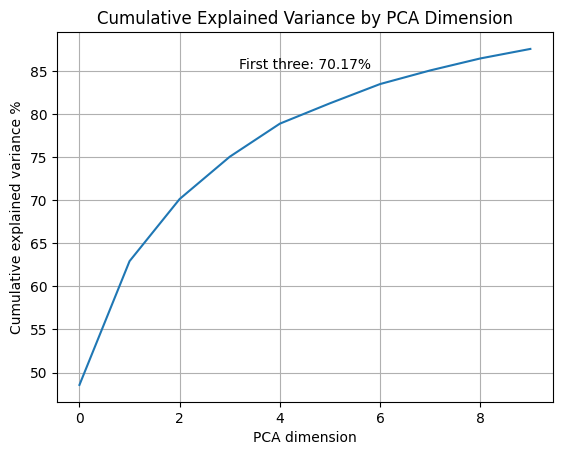

In [6]:
analysis.pca_cumulative_explained_variance()

### Plot 2D Landscapes

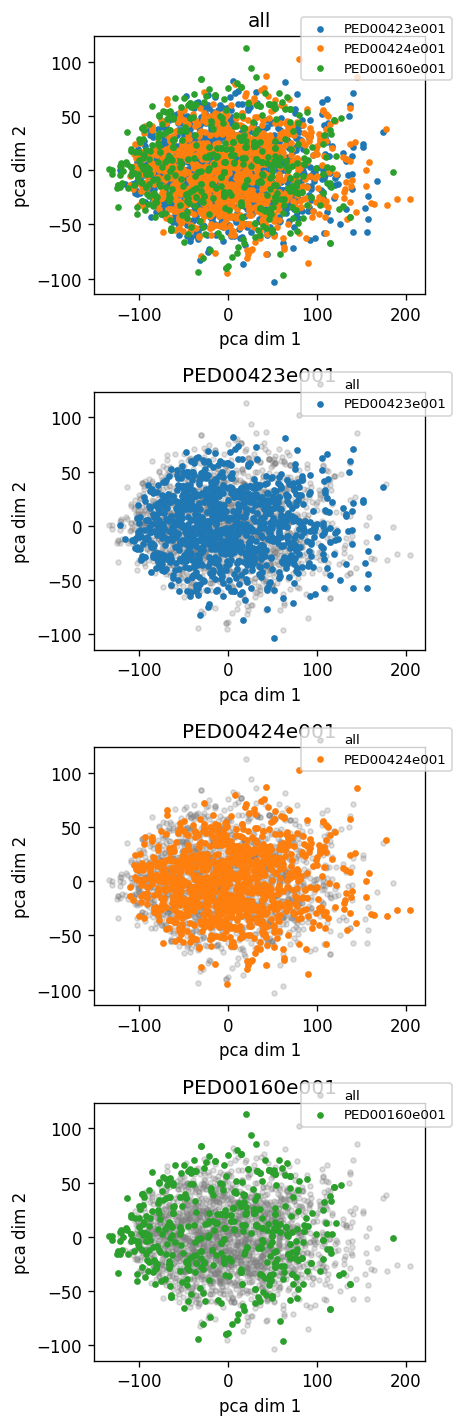

In [7]:
analysis.pca_plot_2d_landscapes(save=True)

### 1D Histograms

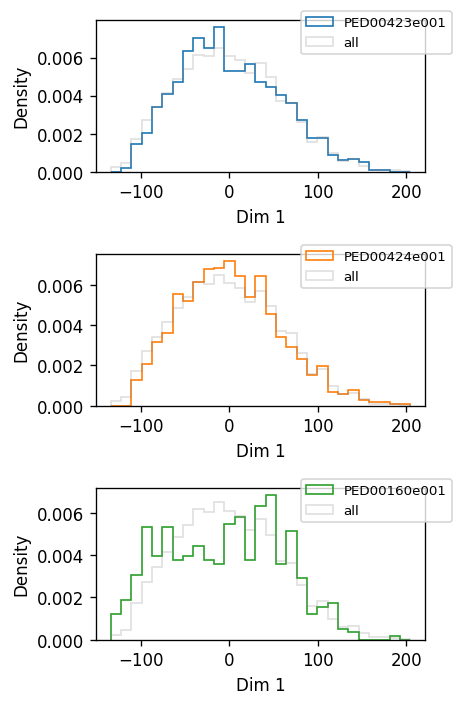

In [8]:
analysis.pca_plot_1d_histograms(save=True)

### Is PC 1 from Ca-Ca correlated with Rg? For fully intrinsically disordered proteins, this is what happens.

An hallmark of fully-disordered ensembles at a global level is the following: when you do PCA with Ca-Ca distances, typically PC dimension 1 is strongly correlated with Rg, it describes changes in chain compactness. This is what happens in Sic1 ensembles too. 

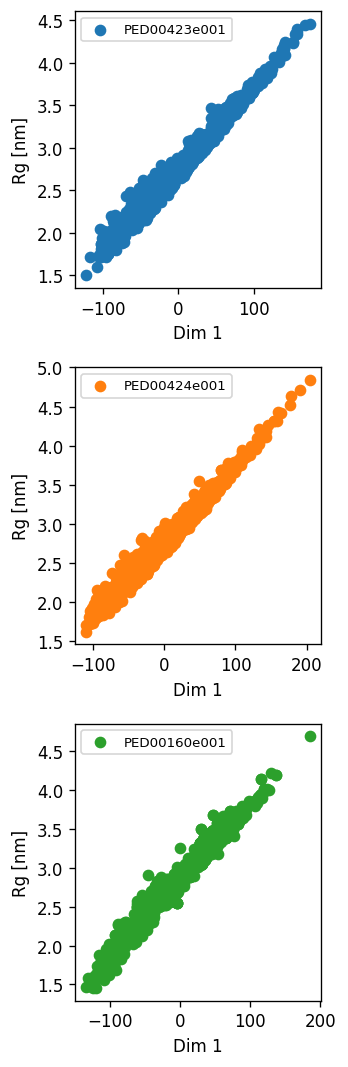

In [9]:
analysis.pca_rg_correlation(save=True)

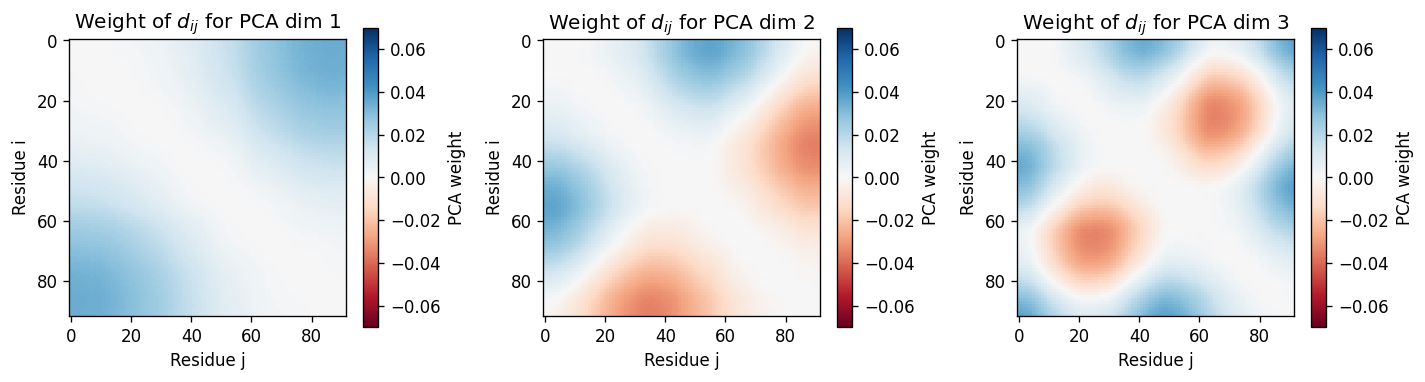

In [10]:
num_residues = 92# Number of residues in the protein.
sel_dims = [0, 1, 2]  # Dimensionality reduction feature we want to analyze
analysis.pca_correlation_plot(num_residues=num_residues, sel_dims=sel_dims)

In [12]:
analysis.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\pca.pdf
